# 导包

In [46]:
import pandas as pd
import numpy as np
import jieba   # 分词包
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import warnings
import random
warnings.filterwarnings("ignore")
from pyecharts.charts import Bar,Grid,Line,Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from wordcloud import WordCloud # 词云包
from sklearn.model_selection import train_test_split

# 数据读取和处理

In [2]:
movies_b = pd.read_csv("movies_piaofang.csv")
movies_m = pd.read_csv("movies_pingfen.csv")
movies = pd.concat([movies_b,movies_m]).drop_duplicates(subset="movie_id").reset_index(drop=True)
movies['movie_id'] = movies['movie_id'].apply(lambda x: int(x))

In [3]:
movies

,box_office,movie_id,movie_title,release_date,directedBy,starring,genre,runtime,country,language,rating_num,vote_num,rating_per_stars5,rating_per_stars4,rating_per_stars3,rating_per_stars2,rating_per_stars1,intro,comment_num,question_num
0,27978.0,26100958,复仇者联盟4：终局之战 Avengers: Endgame,2019,"['安东尼·罗素', '乔·罗素']","['小罗伯特·唐尼', '克里斯·埃文斯', '马克·鲁弗洛', '克里斯·海姆斯沃斯', ...","['剧情', '动作', '科幻', '奇幻', '冒险']",181,美国,英语 / 日语 / 科萨语,8.5,923023,46.1,35.7,15.6,1.9,0.8,一声响指，宇宙间半数生命灰飞烟灭。几近绝望的复仇者们在惊奇队长（布丽·拉尔森 Brie La...,314581,174
1,27897.0,1652587,阿凡达 Avatar,2009,['詹姆斯·卡梅隆'],"['萨姆·沃辛顿', '佐伊·索尔达娜', '西格妮·韦弗', '史蒂芬·朗', '米歇尔·...","['动作', '科幻', '冒险']",162,美国 / 英国,英语 / 西班牙语,8.7,1046959,50.8,36.7,11.3,0.9,0.3,战斗中负伤而下身瘫痪的前海军战士杰克•萨利（萨姆•沃辛顿 Sam Worthington 饰...,206783,17
2,21875.0,1292722,泰坦尼克号 Titanic,1997,['詹姆斯·卡梅隆'],"['莱昂纳多·迪卡普里奥', '凯特·温丝莱特', '比利·赞恩', '凯西·贝茨', '弗...","['剧情', '爱情', '灾难']",194,美国,英语 / 意大利语 / 德语 / 俄语,9.4,1693601,75.0,21.5,3.2,0.2,0.1,1912年4月10日，号称 “世界工业史上的奇迹”的豪华客轮泰坦尼克号开始了自己的处女航，从...,328281,23
3,20682.0,20326665,星球大战7：原力觉醒 Star Wars: The Force Awakens,2015,['J·J·艾布拉姆斯'],"['哈里森·福特', '马克·哈米尔', '凯丽·费雪', '亚当·德赖弗', '黛西·雷德...","['动作', '科幻', '冒险']",135,美国,英语,7.2,196795,14.2,38.8,39.5,5.8,1.7,自从银河帝国衰败之后，正邪轮回再度开始，第一秩序的黑暗力量蔓延滋长，重新为银河系带来威胁。与...,60634,122
4,20484.0,24773958,复仇者联盟3：无限战争 Avengers: Infinity War,2018,"['安东尼·罗素', '乔·罗素']","['小罗伯特·唐尼', '克里斯·海姆斯沃斯', '克里斯·埃文斯', '马克·鲁弗洛', ...","['动作', '科幻', '奇幻', '冒险']",149,美国,英语,8.1,695008,33.0,44.1,19.7,2.3,0.8,最先与灭霸军团遭遇的雷神索尔一行遭遇惨烈打击，洛基遇害，空间宝石落入灭霸之手。未几，灭霸的先...,226207,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,NaN,1308575,蓝色大门 藍色大門,2002,['易智言'],"['陈柏霖', '桂纶镁', '梁又琳', '仇政', '明金成', '林贤能', '黄江丰...","['剧情', '爱情', '同性']",85,台湾 / 法国,汉语普通话,8.3,264174,35.3,44.1,18.9,1.4,0.2,高中生孟克柔（桂纶镁 饰）与林月珍（梁淑慧饰）是无话不谈的好友，月珍告诉克柔，说自己喜欢上了...,68627,23
460,NaN,2053515,曾经 Once,2007,['约翰·卡尼'],"['格伦·汉塞德', '玛可塔·伊尔格洛娃']","['剧情', '爱情', '音乐']",85,爱尔兰,英语 / 捷克语,8.3,195666,38.1,42.3,17.4,1.8,0.3,这是一部由音乐开启的爱尔兰电影。 卖花女（Marketa Irglova）被街头艺人（Gle...,59606,16
461,NaN,1292217,穆赫兰道 Mulholland Dr.,2001,['大卫·林奇'],"['娜奥米·沃茨', '劳拉·哈灵', '安·米勒', '贾斯汀·塞洛克斯', '斯科特·科...","['剧情', '悬疑', '惊悚']",147,法国 / 美国,英语 / 西班牙语,8.3,224077,41.9,38.2,15.7,2.8,1.5,深夜的穆赫兰道发生一桩车祸，女子丽塔（劳拉·赫利 Laura Harring 饰）在车祸中失...,75866,39
462,NaN,3011051,恐怖游轮 Triangle,2009,['克里斯托弗·史密斯'],"['梅利莎·乔治', '利亚姆·海姆斯沃斯', '迈克尔·多曼', '瑞秋·卡帕尼', '艾...","['剧情', '悬疑', '惊悚']",99,英国 / 澳大利亚,英语,8.3,303980,36.8,44.9,16.2,1.7,0.5,单亲母亲杰西（梅利莎·乔治 饰）和一帮朋友乘游艇出海游玩，但她总有一种有不好的事情发生的感觉...,90752,119


In [4]:
# 导入、分词、去停用词
def lcut(Intro_movie):
    segment=[]
    segs = jieba.lcut(Intro_movie) # 将一段话分成词语列表
    for seg in segs:# 单个子的去除
        if len(seg)>1 and seg!='\r\n':
            segment.append(seg)
    return segment

stopwords = pd.read_csv("stopwords.txt" 
                  ,index_col=False
                  ,quoting=3
                  ,sep="\t"
                  ,names=['stopword']
                  ,encoding='utf-8') # quoting=3 全不引用    

def dropstopword(segment):
    # 去停用词,停用词是指在信息检索中，为节省存储空间和提高搜索效率，在处理自然语言数据（或文本）之前或之后会自动过滤掉某些字或词，这些字或词即被称为Stop Words（停用词）
    words_df = pd.DataFrame({'segment':segment})

    #stopwords.head()
    return words_df[~words_df.segment.isin(stopwords.stopword)].segment.values.tolist()

In [5]:
# # 基于TextRank算法的关键词抽取(仅动词和动名词)
import jieba.analyse as analyse

# movies_b['keywords'] = movies_b.intro.apply(lcut)\
#                 .apply(dropstopword)\
#                 .apply(lambda x : " ".join(x))\
#                 .apply(lambda x:" ".join(analyse.textrank(x, topK=8, withWeight=False, allowPOS=('n','vn', 'v','a','z'))))
# movies_b.sort_values('rating_num', ascending=False)[['movie_title','keywords']].head(10)

In [6]:
movies_b['keywords'] = movies_b.intro.apply(lcut)\
                .apply(dropstopword)\
                .apply(lambda x : " ".join(x))\
                .apply(lambda x:" ".join(analyse.extract_tags(x, topK=8, withWeight=False, allowPOS=('n' ,'v','z'))))
movies_b.sort_values('box_office', ascending=False)[['movie_title','keywords']].head(10)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\11514\AppData\Local\Temp\jieba.cache
Loading model cost 1.701 seconds.
Prefix dict has been built successfully.


,movie_title,keywords
0,复仇者联盟4：终局之战 Avengers: Endgame,灭霸 复仇者 队长 宇宙 无限 响指 冰释 找到
1,阿凡达 Avatar,最佳 部落 人类基因 西格 视觉效果 混血 电影史 砍伐
2,泰坦尼克号 Titanic,处女航 温丝 头等舱 投海 未婚夫 船票 驶往 救起
3,星球大战7：原力觉醒 Star Wars: The Force Awakens,军团 秩序 地图 天行者 死星 星者 原力 蛮荒
4,复仇者联盟3：无限战争 Avengers: Infinity War,灭霸 星爵 落入 阻止 蜘蛛侠 遭遇 外星 幻视
5,侏罗纪世界 Jurassic World,暴虐 游客 吸引 生物 速度 骗过 惨剧 精密仪器
6,狮子王 The Lion King,配音 木法 刀疤 王位 迎来 肉中刺 奋进 国度
7,复仇者联盟 The Avengers,地球 复仇者 鹰眼 发威 抵挡 指挥官 侵袭 致命
8,速度与激情7 Furious 7,复仇 探长 对决 世外桃源 死对头 干掉 利刃 王牌
9,冰雪奇缘2 Frozen II,配音 公主 魔法 吟唱 征途 旅程 丧生 追寻


In [7]:
movies_b['keywords'] = movies_b.intro.apply(lcut)\
                .apply(dropstopword)\
                .apply(lambda x : " ".join(x))\
                .apply(lambda x:" ".join(analyse.extract_tags(x, topK=8, withWeight=False, allowPOS=('n' ,'v','z'))))
movies_b.sort_values('box_office', ascending=False)[['movie_title','keywords']].head(10)

,movie_title,keywords
0,复仇者联盟4：终局之战 Avengers: Endgame,灭霸 复仇者 队长 宇宙 无限 响指 冰释 找到
1,阿凡达 Avatar,最佳 部落 人类基因 西格 视觉效果 混血 电影史 砍伐
2,泰坦尼克号 Titanic,处女航 温丝 头等舱 投海 未婚夫 船票 驶往 救起
3,星球大战7：原力觉醒 Star Wars: The Force Awakens,军团 秩序 地图 天行者 死星 星者 原力 蛮荒
4,复仇者联盟3：无限战争 Avengers: Infinity War,灭霸 星爵 落入 阻止 蜘蛛侠 遭遇 外星 幻视
5,侏罗纪世界 Jurassic World,暴虐 游客 吸引 生物 速度 骗过 惨剧 精密仪器
6,狮子王 The Lion King,配音 木法 刀疤 王位 迎来 肉中刺 奋进 国度
7,复仇者联盟 The Avengers,地球 复仇者 鹰眼 发威 抵挡 指挥官 侵袭 致命
8,速度与激情7 Furious 7,复仇 探长 对决 世外桃源 死对头 干掉 利刃 王牌
9,冰雪奇缘2 Frozen II,配音 公主 魔法 吟唱 征途 旅程 丧生 追寻


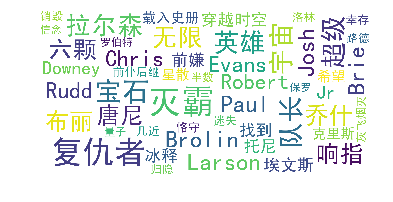

In [8]:
keywords= movies_b.intro.apply(lcut)\
                .apply(dropstopword)\
                .apply(lambda x : " ".join(x))\
                .apply(lambda x: (analyse.extract_tags(x, topK=50, withWeight=True)))
word_fre  = {x:y for x, y in keywords[0]}
cloud = WordCloud(
 # 设置字体，不指定就会出现乱码
 font_path="simhei.ttf", #这个路径是pc中的字体路径
 # 设置背景色
 background_color='white',
mode="RGBA",
    scale  =5,
 # 允许最大词汇
 max_words=200,
 # 最大号字体
 max_font_size=40
)
wc = cloud.fit_words(word_fre)
plt.axis("off")
plt.imshow(wc)

In [9]:
data1 = pd.read_json("../data/top_office/movie_comment20.json", lines=True,encoding='utf-8')
data2 = pd.read_json("../data/top_office/movie_comment40.json", lines=True,encoding='utf-8')
data3 = pd.read_json("../data/top_office/movie_comment60.json", lines=True,encoding='utf-8')
data4 = pd.read_json("../data/top_office/movie_comment80.json", lines=True,encoding='utf-8')
data5 = pd.read_json("../data/top_office/movie_comment110.json", lines=True,encoding='utf-8')
data6 = pd.read_json("../data/top_office/movie_comment140.json", lines=True,encoding='utf-8')
data7 = pd.read_json("../data/top_office/movie_comment170.json", lines=True,encoding='utf-8')
data8 = pd.read_json("../data/top_office/movie_comment200.json", lines=True,encoding='utf-8')
data9 = pd.read_json("../data/top_office/movie_comment230.json", lines=True,encoding='utf-8')
data10 = pd.read_json("../data/top_office/movie_comment250.json", lines=True,encoding='utf-8')
datas = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
comm1 = pd.concat(datas).drop_duplicates(subset="comment_id").reset_index(drop=True)
file = ['../data/top_mark/movie_comment%s.json' %j for j in [ i for i in range(20,220,20)] +[225,250]]
datas = []
for sr in file:
    datas.append(pd.read_json(sr, lines=True,encoding='utf-8'))
comm2 = pd.concat(datas).drop_duplicates(subset="comment_id").reset_index(drop=True)

In [10]:
comm1

,movie_id,URL,comment_id,useful_num,star,time,content,people,people_url
0,26100958,https://movie.douban.com/subject/26100958/comm...,1364011224,37274,allstar50 rating,[2019-04-24 02:23:59],[如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的],棠枫海,https://www.douban.com/people/146803809/
1,26100958,https://movie.douban.com/subject/26100958/comm...,1762639519,20741,allstar40 rating,[2019-04-24 00:11:06],[我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落...,Tel,https://www.douban.com/people/164105540/
2,26100958,https://movie.douban.com/subject/26100958/comm...,1762628760,16016,allstar50 rating,[2019-04-24 00:01:17],[托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”...,朝暮雪,https://www.douban.com/people/lingrui1995/
3,26100958,https://movie.douban.com/subject/26100958/comm...,1762741840,14352,allstar50 rating,[2019-04-24 03:05:48],[钢铁侠成为了美队，美队活成了钢铁侠。],Rafe,https://www.douban.com/people/Rafe0323/
4,26100958,https://movie.douban.com/subject/26100958/comm...,1762795339,12817,allstar50 rating,[2019-04-24 04:52:12],[谁能想到是一只老鼠拯救了地球呢？],KarSa,https://www.douban.com/people/karsa/
...,...,...,...,...,...,...,...,...,...
211506,1607471,https://movie.douban.com/subject/1607471/comme...,286579861,0,allstar30 rating,[2010-08-26 02:53:27],[实在不想再看到凯奇哥，若是以后演老年剧可能会看看。。。],Pixie,https://www.douban.com/people/2476087/
211507,1607471,https://movie.douban.com/subject/1607471/comme...,41780959,0,allstar30 rating,[2008-05-24 00:32:14],[我大叔唉。。学会挤眉弄眼了。。不说了。。],嘟小七,https://www.douban.com/people/duducool/
211508,1607471,https://movie.douban.com/subject/1607471/comme...,179414810,0,allstar30 rating,[2009-11-16 23:13:51],[和前作相比没有新意],木木茶,https://www.douban.com/people/mumucha/
211509,1607471,https://movie.douban.com/subject/1607471/comme...,200315884,0,allstar30 rating,[2010-01-08 20:33:23],[只能是还行。。CAGE的演技很牛逼],我真不是大雁,https://www.douban.com/people/ez2dier/


In [11]:
comm2['movie_id'] = comm2['movie_id'].apply(lambda x: int(x[0][5:]))
comm2['content'] = comm2.content.apply(lambda x: x[0].strip())
# comm2['people'] = comm2.people.apply(lambda x: x.strip())
# 用url中的名称替代
comm2['people'] = comm2.people_url.apply(lambda x: x[30:-1])
comm2['useful_num'] = comm2.useful_num.apply(lambda x: int(x))
def regular_nonstar(x):
    if x == 'comment-time':
        return 'allstar00 rating'
    else:
        return x
comm2['star'] = comm2.star.apply(regular_nonstar).apply(lambda x: int(x[7]))
comm2['time'] = pd.to_datetime(comm2.time.apply(lambda x: x[0]))

In [12]:
comm2.head(1)

,movie_id,URL,star,content,comment_id,people,useful_num,time,people_url
0,1292052,https://movie.douban.com/subject/1292052/comments,5,不需要女主角的好电影,2050003,kingfish,11314,2006-03-22 12:38:09,https://www.douban.com/people/kingfish/


In [13]:
comm1['movie_id'] = comm1['movie_id'].apply(lambda x: int(x))
# comm1['content'] = comm1.content.apply(lambda x: "".join(x).strip())
comm1["content"] = comm1.content.apply(lambda x: "".join(x).strip())
comm1['people'] = comm1.people_url.apply(lambda x: x[30:-1])
comm1['useful_num'] = comm1.useful_num.apply(lambda x: int(x))
comm1['star'] = comm1.star.apply(regular_nonstar).apply(lambda x: int(x[7]))
comm1['time'] = pd.to_datetime(comm1.time.apply(lambda x: x[0]))

In [14]:
comm1.head(1)
comm = pd.concat([comm1,comm2])
comm = comm.drop_duplicates(subset="comment_id").reset_index(drop=True)


In [15]:
temp = movies[["movie_id","movie_title","rating_num"]]
comm = pd.merge(comm,temp,on=['movie_id'])
comment = comm
comment.groupby(["movie_id","movie_title"])["star"].describe().sort_values("count",ascending=False).head(20)

,,count,mean,std,min,25%,50%,75%,max
movie_id,movie_title,,,,,,,,
1292720,阿甘正传 Forrest Gump,1740.0,3.800000,1.422404,0.0,3.0,4.0,5.0,5.0
1291843,黑客帝国 The Matrix,1666.0,3.751501,1.347029,0.0,3.0,4.0,5.0,5.0
2131459,机器人总动员 WALL·E,1665.0,3.896096,1.301124,0.0,3.0,4.0,5.0,5.0
1301753,狮子王 The Lion King,1660.0,3.718675,1.360251,0.0,3.0,4.0,5.0,5.0
1291552,指环王3：王者无敌 The Lord of the Rings: The Return of the King,1639.0,3.799878,1.367323,0.0,3.0,4.0,5.0,5.0
3541415,盗梦空间 Inception,1639.0,3.716290,1.420475,0.0,3.0,4.0,5.0,5.0
1851857,蝙蝠侠：黑暗骑士 The Dark Knight,1637.0,3.777642,1.329803,0.0,3.0,4.0,5.0,5.0
1292849,拯救大兵瑞恩 Saving Private Ryan,1625.0,3.648615,1.346945,0.0,3.0,4.0,5.0,5.0
1297630,第六感 The Sixth Sense,1624.0,3.717365,1.263564,0.0,3.0,4.0,5.0,5.0


In [16]:
comm

,movie_id,URL,comment_id,useful_num,star,time,content,people,people_url,movie_title,rating_num
0,26100958,https://movie.douban.com/subject/26100958/comm...,1364011224,37274,5,2019-04-24 02:23:59,如果你不喜欢这部电影，说明他不是为你准备的，故事的终章是为读过故事的人准备的,146803809,https://www.douban.com/people/146803809/,复仇者联盟4：终局之战 Avengers: Endgame,8.5
1,26100958,https://movie.douban.com/subject/26100958/comm...,1762639519,20741,4,2019-04-24 00:11:06,我是一个90后，我曾经很羡慕“上一代人”：40年前的观众，他们的影院里有星战正传三部曲的落幕...,164105540,https://www.douban.com/people/164105540/,复仇者联盟4：终局之战 Avengers: Endgame,8.5
2,26100958,https://movie.douban.com/subject/26100958/comm...,1762628760,16016,5,2019-04-24 00:01:17,托尼说好要回归家庭、陪伴家人，可最终还是选择了重出江湖，因为责任和使命，因为“我是钢铁侠”。...,lingrui1995,https://www.douban.com/people/lingrui1995/,复仇者联盟4：终局之战 Avengers: Endgame,8.5
3,26100958,https://movie.douban.com/subject/26100958/comm...,1762741840,14352,5,2019-04-24 03:05:48,钢铁侠成为了美队，美队活成了钢铁侠。,Rafe0323,https://www.douban.com/people/Rafe0323/,复仇者联盟4：终局之战 Avengers: Endgame,8.5
4,26100958,https://movie.douban.com/subject/26100958/comm...,1762795339,12817,5,2019-04-24 04:52:12,谁能想到是一只老鼠拯救了地球呢？,karsa,https://www.douban.com/people/karsa/,复仇者联盟4：终局之战 Avengers: Endgame,8.5
...,...,...,...,...,...,...,...,...,...,...,...
450917,1291583,https://movie.douban.com/subject/1291583/comme...,232767186,0,5,2010-03-24 19:30:51,喜欢里面的奇思妙想，空灵而优美的音乐，因此还把它刻成光盘珍藏了,echozhanglijun,https://www.douban.com/people/echozhanglijun/,天空之城 天空の城ラピュタ,9.0
450918,1291583,https://movie.douban.com/subject/1291583/comme...,453274665,0,5,2011-11-03 16:10:50,忘不了那优美的音乐,ponyoicy,https://www.douban.com/people/ponyoicy/,天空之城 天空の城ラピュタ,9.0
450919,1291583,https://movie.douban.com/subject/1291583/comme...,34553643,0,5,2008-03-22 10:37:49,看的第一部宫崎骏的作品 之后坚定了我要看全宫崎骏全部作品的决心,1900555,https://www.douban.com/people/1900555/,天空之城 天空の城ラピュタ,9.0
450920,1291583,https://movie.douban.com/subject/1291583/comme...,576096444,0,5,2012-09-03 13:09:16,谁愿陪伴我身旁 找到它的方向...探访天际的家乡 你是我的翅膀.,38355555,https://www.douban.com/people/38355555/,天空之城 天空の城ラピュタ,9.0


# 评论合并(运行上面代码生成训练所需的数据)

In [17]:
def ls_str(x):
    return " ".join(x.content.values.tolist())
# comment 合并同个电影所有影评
comment = comment.groupby(["movie_id","movie_title"]).apply(ls_str)
comment = comment.reset_index().rename(columns ={0:"content"})
comment["content"] = comment.content.apply(lcut).apply(dropstopword).apply(lambda x : " ".join(x))
comment["length"] = comment['content'].str.len()
comment = comment.sort_values("length",ascending=False).reset_index(drop=True)
corpus=comment.content.tolist()
comment

,movie_id,movie_title,content,length
0,27119724,小丑 Joker,漫威 制造 大坏蛋 超高 智慧 强大 肉体 技能 无限 宝石 DC 糟糕 人生 年前 制造 ...,84058
1,26266893,流浪地球,北京 道路 提醒 道路 千万条 第一条 行车 规范 亲人 两行 这句 广播 洗脑 押点 哈哈...,81080
2,26754233,八佰,王千源 没有碰过 女人 飞机 特别 厉害 电影 结束 全场 静默 仿佛 观众 沉浸 那种 悲...,79871
3,1889243,星际穿越 Interstellar,诺兰 活得够 豆瓣 TOP250 承包 时间 伸缩 折叠 唯独 倒退 鹤发 童颜 呼吸 抵过...,76984
4,26794435,哪吒之魔童降世,实名 反对 最赞 烂片 评论 这是 人类 逃脱 真香 定律 不值 票钱 快乐 星球 邓超救 ...,73807
...,...,...,...,...
458,1457217,哈利·波特与凤凰社 Harry Potter and the Order of the Ph...,没什么 场面 精彩 特效 政治 斗争 阴谋诡计 幼稚 没边 三徐 看不下去 只好 杀人 游戏...,10236
459,1315574,加勒比海盗2：聚魂棺 Pirates of the Caribbean: Dead Man'...,土著 那段 惨爹 哈哈哈 树林 打来打去 一场 欢乐 野人 一段 搞笑 编剧 极尽 所能 这...,7017
460,2973079,霍比特人3：五军之战 The Hobbit: The Battle of the Five ...,笑点 拉斯 超级玛丽 阿佐格 阿尔弗雷 卷福 那条 死于 甘道夫 女王 公主 片尾 素描 分...,4105
461,11606328,霍比特人2：史矛革之战 The Hobbit: The Desolation of Smaug,矮人 食人妖 抓走 矮人 哥不林 抓走 矮人 蜘蛛 抓走 矮人 精灵 抓走 矮人 人类 抓走...,3668


# 关键词提取 

## TF-IDF

In [18]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值
tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
word=vectorizer.get_feature_names()#获取词袋模型中的所有词语
weight=tfidf.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
info= {}
for j in range(len(word)):
    info[word[j]] = weight[1][j]
data = pd.DataFrame(pd.Series(info)).reset_index()
data.columns = ["world","tfidf"]
data = data.sort_values("tfidf",ascending = False)
data = data.reset_index(drop = True)

In [19]:
data_tfidf = data.iloc[:60]
data_tfidf.head(10)

,world,tfidf
0,科幻,0.350719
1,地球,0.310135
2,流浪,0.270352
3,吴京,0.232492
4,中国,0.202006
5,电影,0.196852
6,木星,0.194055
7,特效,0.186893
8,科幻电影,0.170765
9,刘慈欣,0.155628


## TextTrank

In [20]:
keywords = jieba.analyse.textrank(corpus[1], topK=60, withWeight=True)
info= {}
for item in keywords:
    info[item[0]] = item[1]
data = pd.DataFrame(pd.Series(info)).reset_index()
data.columns = ["world","trank"]
data_trank = data.sort_values("trank",ascending = False).reset_index(drop = True).iloc[:60]
data_trank.head(10)

,world,trank
0,地球,1.000000
1,电影,0.996673
2,科幻,0.975426
3,中国,0.958317
4,流浪,0.489865
5,煽情,0.396438
6,人物,0.374241
7,科幻片,0.369000
8,台词,0.360245
9,人类,0.358842


## LDA

In [21]:
from gensim import corpora, models
import jieba.posseg as jp
import jieba

def LDA_model(words_list):
    # 构造词典
    # Dictionary()方法遍历所有的文本，为每个不重复的单词分配一个单独的整数ID，同时收集该单词出现次数以及相关的统计信息
    dictionary = corpora.Dictionary(words_list)
    # print('打印查看每个单词的id:')
    # print(dictionary.token2id)  # 打印查看每个单词的id
    # 将dictionary转化为一个词袋
    # doc2bow()方法将dictionary转化为一个词袋。得到的结果corpus是一个向量的列表，向量的个数就是文档数。
    # 在每个文档向量中都包含一系列元组,元组的形式是（单词 ID，词频）
    corpus = [dictionary.doc2bow(words) for words in words_list]
    # print('输出每个文档的向量:')
    # print(corpus)  # 输出每个文档的向量
    # LDA主题模型
    # num_topics -- 必须，要生成的主题个数。
    # id2word    -- 必须，LdaModel类要求我们之前的dictionary把id都映射成为字符串。
    # passes     -- 可选，模型遍历语料库的次数。遍历的次数越多，模型越精确。但是对于非常大的语料库，遍历太多次会花费很长的时间。
    lda_model = models.ldamodel.LdaModel(corpus=corpus, num_topics=1, id2word=dictionary, passes=50)
    return lda_model

# 获取分词后的文本列表
words_list =  comm[comm["movie_id"]==26266893].content.apply(lcut).apply(dropstopword).tolist()

# 获取训练后的LDA模型
lda_model = LDA_model(words_list)
# 可以用 print_topic 和 print_topics 方法来查看主题
# 打印所有主题，每个主题显示5个词
topic_words = lda_model.print_topics(num_topics=1, num_words=60)
# print('打印所有主题，每个主题显示5个词:')
# print(topic_words)
# 输出该主题的的词及其词的权重
words_list = lda_model.show_topic(0, 60)
info= {}
for item in words_list:
    info[item[0]] = item[1]
data = pd.DataFrame(pd.Series(info)).reset_index()
data.columns = ["world","lda"]
data_lda = data.sort_values("lda",ascending = False).reset_index(drop = True).iloc[:60]
data_lda.head(10)

,world,lda
0,电影,0.011000
1,科幻,0.010787
2,中国,0.010514
3,地球,0.009876
4,特效,0.007232
5,流浪,0.004923
6,煽情,0.004224
7,科幻片,0.004193
8,人物,0.004011
9,故事,0.003889


## Word2Vec

In [22]:
#sg=1是skip—gram算法，对低频词敏感，默认sg=0为CBOW算法
#size是神经网络层数，值太大则会耗内存并使算法计算变慢，一般值取为100到200之间。
#window是句子中当前词与目标词之间的最大距离，3表示在目标词前看3-b个词，后面看b个词（b在0-3之间随机）
#min_count是对词进行过滤，频率小于min-count的单词则会被忽视，默认值为5。
#negative和sample可根据训练结果进行微调，sample表示更高频率的词被随机下采样到所设置的阈值，默认值为1e-3,
#negative: 如果>0,则会采用negativesamping，用于设置多少个noise words
#hs=1表示层级softmax将会被使用，默认hs=0且negative不为0，则负采样将会被选择使用。
import gensim
# sentences = comment.content.str.split(" ").tolist()
# model=gensim.models.Word2Vec(sentences,sg=0,size=150,window=3,min_count=2,negative=3,sample=0.001,hs=1,workers=4)
# model.save("word2vec_modle")
model = gensim.models.Word2Vec.load("word2vec_modle")
# 此函数计算某词对于模型中各个词的转移概率p(wk|wi)
def predict_proba(oword, iword):
    #获取输入词的词向量
    iword_vec = model[iword]
    #获取保存权重的词的词库
    oword = model.wv.vocab[oword]
    oword_l = model.trainables.syn1[oword.point].T
    dot = np.dot(iword_vec, oword_l)
    lprob = -sum(np.logaddexp(0, -dot) + oword.code*dot) 
    return lprob
from collections import Counter
def keywords(s):
    #抽出s中和与训练的model重叠的词
    s = [w for w in s if w in model]
    ws = {w:sum([predict_proba(u, w) for u in s]) for w in s}
    return Counter(ws).most_common()

frequency = pd.DataFrame(comment.content.str.split(" ")[1])
frequency["num"] = 1
frequency  = frequency.groupby(0).sum().sort_values("num",ascending=False)
sentence = frequency[frequency['num']>15].index.tolist()
x = pd.Series(keywords(sentence))
# 输出最重要的前60个词
words_list = x[:60]
info= {}
for item in words_list:
    info[item[0]] = item[1]
data = pd.DataFrame(pd.Series(info)).reset_index()
data.columns = ["world","w2v"]
data_w2v = data.sort_values("w2v",ascending = False).reset_index(drop = True).iloc[:60]
data_w2v.head(10)


,world,w2v
0,郭帆,-1757.133688
1,联合政府,-1774.407979
2,地下城,-1783.770349
3,刘慈欣,-1812.050486
4,救援队,-1827.208292
5,元年,-1869.175104
6,朵朵,-1877.624687
7,木星,-1912.290113
8,可惜,-1937.365457
9,至少,-1951.742979


## 展示和分析

In [23]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud,Page
word1 = data_tfidf.world.values.tolist()
value1 = data_tfidf.tfidf.values.tolist()
datas1 = [(x,y) for x,y in zip(word1,value1)]
word2 = data_trank.world.values.tolist()
value2 = data_trank.trank.values.tolist()
datas2 = [(x,y) for x,y in zip(word2,value2)]
word3 = data_lda.world.values.tolist()
value3 = data_lda.lda.values.tolist()
datas3 = [(x,y) for x,y in zip(word3,value3)]
word4 = data_w2v.world.values.tolist()
value4 = data_w2v.w2v.values.tolist()
datas4 = [(x,y) for x,y in zip(word4,value4)]
clo = (
    WordCloud(init_opts=opts.InitOpts(width="950px", height="900px"))
    .add(series_name="tfidf", data_pair=datas1, word_size_range=[10, 60],shape = "circle",pos_top="-10%",pos_left="-10%")
    .add(series_name="textrank", data_pair=datas2, word_size_range=[10, 60],shape = "circle",pos_top="-10%",pos_left="40%")
    .add(series_name="lda", data_pair=datas3, word_size_range=[10, 60],shape = "circle",pos_top="35%",pos_left="-10%")
     .add(series_name="word2vec", data_pair=datas4, word_size_range=[10, 60],shape = "circle",pos_top="35%",pos_left="40%")
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="流浪地球", title_textstyle_opts=opts.TextStyleOpts(font_size=24)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)

clo.render_notebook()


In [26]:
cmp = pd.concat([frequency.reset_index()[0],data_lda.world,data_tfidf.world,data_trank.world,data_w2v.world],axis = 1)
cmp.columns = ["frequency","lda","tfidf","texttrank","word2vec"]
cmp[['tfidf','frequency']].head(10)


,tfidf,frequency
0,科幻,电影
1,地球,科幻
2,流浪,中国
3,吴京,地球
4,中国,特效
5,电影,流浪
6,木星,煽情
7,特效,科幻片
8,科幻电影,人物
9,刘慈欣,故事


# 文本分类

In [18]:
comm_star = comm.groupby(['movie_id','movie_title'])['star'].apply(pd.Series.value_counts).to_frame().unstack().reset_index()
comm_star["low"] = (comm_star.star[1]+comm_star.star[2])/(comm_star.star[1]+comm_star.star[2]+comm_star.star[3]+comm_star.star[4]+comm_star.star[5])
comm_star["mid"] = (comm_star.star[3])/(comm_star.star[1]+comm_star.star[2]+comm_star.star[3]+comm_star.star[4]+comm_star.star[5])
comm_star["high"] = (comm_star.star[4]+comm_star.star[5])/(comm_star.star[1]+comm_star.star[2]+comm_star.star[3]+comm_star.star[4]+comm_star.star[5])
comm_star

movie_id                                        movie_title  star         \
                                                                     0      1   
0     1291544  哈利·波特与阿兹卡班的囚徒 Harry Potter and the Prisoner of...   NaN   38.0   
1     1291545                                        大鱼 Big Fish  29.0    4.0   
2     1291548                            死亡诗社 Dead Poets Society  12.0    3.0   
3     1291549                               放牛班的春天 Les choristes  25.0    3.0   
4     1291552  指环王3：王者无敌 The Lord of the Rings: The Return of...  29.0   74.0   
..        ...                                                ...   ...    ...   
458  26931786                 蜘蛛侠：英雄远征 Spider-Man: Far from Home   NaN   64.0   
459  27119724                                           小丑 Joker   NaN  104.0   
460  27133569                              小丑回魂2 It: Chapter Two   NaN   55.0   
461  27163278   速度与激情：特别行动 Fast & Furious Presents: Hobbs & Shaw   NaN   51.0   
462  30128985                勇敢者游戏2：再战巅峰 Jumanji: The Next Level   NaN   57.0   

                                      low       mid      high  
         2      3      4      5                                
0    262.0  297.0  173.0  130.0  0.333333  0.330000  0.336667  
1      9.0   97.0  325.0  576.0  0.012859  0.095945  0.891197  
2     16.0  110.0  335.0  564.0  0.018482  0.107004  0.874514  
3     11.0   68.0  276.0  656.0  0.013807  0.067061  0.919132  
4    227.0  313.0  219.0  777.0  0.186957  0.194410  0.618634  
..     ...    ...    ...    ...       ...       ...       ...  
458  235.0  300.0  200.0  101.0  0.332222  0.333333  0.334444  
459  196.0  300.0  124.0  176.0  0.333333  0.333333  0.333333  
460  249.0  299.0  253.0   44.0  0.337778  0.332222  0.330000  
461  249.0  299.0  257.0   43.0  0.333704  0.332592  0.333704  
462  243.0  300.0  257.0   43.0  0.333333  0.333333  0.333333  

[463 rows x 11 columns]

In [19]:
import random
random.seed(1234)
comm["label"] = comm['star'].apply(lambda x :  0 if x<3 else 1 if x>3 else -1)
comm_data = comm[comm.star !=0]
comm_data 
comm_data.label.value_counts()

 1    273857
-1     95992
 0     74222
Name: label, dtype: int64

In [20]:
# ~~~~~~~~~~生成数据已经保存~~~~~~~~~~~~~~~
# # 中评比较模棱两可
# like = comm_data[comm_data.label==1].content.values.tolist()
# dislike = comm_data[comm_data.label==0].content.values.tolist()
# def preprocess_text(content_lines, sentences, category):
#     for line in content_lines:
#         try:
#             segs=jieba.lcut(line)
#             segs = filter(lambda x:len(x)>1, segs)
#             segs = filter(lambda x:x not in stopwords.stopword, segs)
#             sentences.append((" ".join(segs), category))
#         except:
#             print (line)
#             continue
# sen = []
# # 上采样,解决样本不均衡
# preprocess_text(like, sen, 'like')
# preprocess_text(dislike, sen, 'dislike')
# preprocess_text(dislike, sen, 'dislike')
# preprocess_text(dislike, sen, 'dislike')
# # 存sen
# temp_file = pd.DataFrame(pd.Series(sen).reset_index(drop = True))
# temp_file.to_csv("temp_filem_ML.csv",index=False)

In [21]:
# 将元组字符串解构成元组
sen = pd.read_csv("temp_filem_ML.csv")['0'].apply(lambda x: tuple(eval(x)))

In [22]:
sen

0               (如果 喜欢 这部 电影 说明 不是 准备 故事 终章 读过 故事 准备, like)
1         (一个 90 曾经 羡慕 一代人 40 年前 观众 他们 影院 星战 正传 三部曲 落幕 2...
2         (托尼 说好 回归 家庭 陪伴 家人 最终 还是 选择 重出江湖 因为 责任 使命 因为 钢...
3                                 (钢铁 成为 美队 美队 活成 钢铁, like)
4                                    (想到 一只 老鼠 拯救 地球, like)
                                ...                        
496518                          (宮崎駿 動畫 太超 現實 不喜歡, dislike)
496519    (大师 作品 较差 一部 无聊 俗气 没法 产生共鸣 以及 喜欢 男女 主角 喜欢 笨人 喜...
496520                (观测 爱看 动漫 比较 乐观 可惜 告诉 什么 好看, dislike)
496521              (个人 虫子 有关 电影 看好 比较 喜欢 后来 幽灵公主, dislike)
496522         (這是 唯一 宮崎駿 系列 喜歡 片子 知道 喜歡 就是 沒有 好感, dislike)
Name: 0, Length: 496523, dtype: object

## 朴素贝叶斯

In [26]:
random.shuffle(sen)# 所有元素随机排列
from sklearn.model_selection import train_test_split
x, y = zip(*sen[:200000]) # 带星号的用来解压
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

class TextClassifier():

    def __init__(self, classifier=BernoulliNB()):
        self.classifier = classifier
        self.vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,4), max_features=20000)

    def features(self, X):
        return TfidfTransformer().fit_transform(self.vectorizer.transform(X))
#         return self.vectorizer.transform(X)

    def fit(self, X, y):
        self.vectorizer.fit(X)
        self.classifier.fit(self.features(X), y)

    def predict(self, X):
        return self.classifier.predict(self.features(X))

    def score(self, X, y):
        return self.classifier.score(self.features(X), y)

In [27]:
text_classifier = TextClassifier()
text_classifier.fit(x_train, y_train)

In [43]:
print(text_classifier.predict(["特效不错,但是剧情硬伤",
                        "真难看,我喜欢"]))
print(text_classifier.score(x_test, y_test))

['like' 'like']
0.78792


In [32]:
#预测
# comm[comm.star ==0].content[:10].values.tolist()
# show_train = pd.DataFrame(pd.Series(comm[comm.star ==0].content[:50].values.tolist())).reset_index(drop = True)
# show_pre = pd.DataFrame(pd.Series(text_classifier.predict(comm[comm.star ==0].content[:50].values.tolist()))).reset_index(drop = True)
# show = pd.concat([show_train,show_pre],axis=1)
# show

## SVM支持向量机

In [41]:
from sklearn.svm import SVC
x, y = zip(*sen[:50000]) # 带星号的用来解压
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)
svm = SVC(kernel='linear')
text_classifier = TextClassifier(svm)
text_classifier.fit(x_train, y_train)

In [51]:
print(text_classifier.predict(["特效不错,但是剧情硬伤",
                        "我喜欢"]))
print(text_classifier.score(x_test, y_test))

['like' 'like']


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

## 逻辑回归

In [35]:
from sklearn.linear_model import LogisticRegression
x, y = zip(*sen) # 带星号的用来解压
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)
lgr = LogisticRegression(solver='sag')
text_classifier = TextClassifier(lgr)
text_classifier.fit(x_train, y_train)
print(text_classifier.predict(["特效不错,但是剧情硬伤",
                        "我觉得还行"]))
print(text_classifier.score(x_test, y_test))

['like' 'like']
0.8225906502001917


##  FastText

In [36]:
# like = comm_data[comm_data.label==1].content.values.tolist()
# dislike = comm_data[comm_data.label==0].content.values.tolist()
# len(dislike)

74222

In [37]:
# # ~~~~~~~~已经生成数据文件~~~~~~~~~~~~~~~~~
# import jieba 
# import pandas as pd 
# import random
# like = comm_data[comm_data.label==1].content.values.tolist()
# dislike = comm_data[comm_data.label==0].content.values.tolist()

# def preprocess_text(content_lines,sentences,category): 
#     for line in content_lines:
#         try:
#             segs=jieba.lcut(line)
#             segs = filter(lambda x:len(x)>1, segs)
#             segs = filter(lambda x:x not in stopwords, segs)
#             sentences.append("__label__"+str(category)+" , "+" ".join(segs))
#         except:
#             print(line)
#             continue
            
# # 生成训练数据            
# senten=[]
# preprocess_text(like,senten ,'like')
# preprocess_text(dislike,senten ,'dislike')
# preprocess_text(dislike,senten ,'dislike')
# preprocess_text(dislike,senten ,'dislike')

# random.shuffle(senten)

# print("writing data to fasttext supervised learning format...")
# out = open('train_data_supervised_fasttext.txt','w' )#,encoding='utf-8') 
# for sentence in senten:
#     out.write(sentence+"\n") 
# print("done!")
# out = open('train_data_supervised_fasttext.txt','w' )#,encoding='utf-8') 
# for sentence in senten[:372392]:
#     out.write(sentence+"\n") 

# out1 = open('test_data_supervised_fasttext.txt','w' )#,encoding='utf-8') 
# for sentence in senten[372393:]:
#     out1.write(sentence+"\n") 

In [38]:
import fasttext
# 有监督
classifier=fasttext.train_supervised('train_data_supervised_fasttext.txt',lr=1.0,dim=200,wordNgrams=4,epoch=30)
# 对模型进行评估
result = classifier.test('test_data_supervised_fasttext.txt')
# print('P@1:',result.precision)
# print('R@1:',result.recall)
# print('Number of examples:',result.nexamples)
print(result[1])

0.9351486344960928


In [ ]:
texts = "特效不错,但是剧情硬伤"
labels=classifier.predict(texts)
print(labels)

# 数据准备

In [47]:
sen = pd.read_csv("temp_filem_ML.csv")['0'].apply(lambda x: tuple(eval(x)))
random.shuffle(sen)     
x,y=zip(*sen)
train_data,test_data,train_target,test_target=train_test_split(x, y, random_state=1234)
cate_dic={'like':1,'dislike':0}
y_train = pd.Series(train_target).apply(lambda x:cate_dic[x] , train_target)
y_test = pd.Series(test_target).apply(lambda x:cate_dic[x] , test_target)

# CNN

In [69]:
"""
基于卷积神经网络的中文文本分类
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf

learn = tf.contrib.learn
FLAGS = None
# 文档最长长度
MAX_DOCUMENT_LENGTH = 100
# 最小词频数
MIN_WORD_FREQUENCE = 2
# 词嵌入的维度
EMBEDDING_SIZE = 20
# filter个数
N_FILTERS = 10 # 10个神经元
# 感知野大小
WINDOW_SIZE = 20
#filter的形状
FILTER_SHAPE1 = [WINDOW_SIZE, EMBEDDING_SIZE]
FILTER_SHAPE2 = [WINDOW_SIZE, N_FILTERS] 
# 池化
POOLING_WINDOW = 4
POOLING_STRIDE = 2
n_words = 0

def cnn_model(features, target):
    """
    2层的卷积神经网络，用于短文本分类
    """
    # 先把词转成词嵌入
    # 我们得到一个形状为[n_words, EMBEDDING_SIZE]的词表映射矩阵
    # 接着我们可以把一批文本映射成[batch_size, sequence_length,EMBEDDING_SIZE]的矩阵形式
    
    target = tf.one_hot(target, 15, 1, 0) #对词编码最大选前15个标签,在的为1,不在的为0
    print(target)
    # 把词变成词嵌入, feature 词矩阵, vocab_size输入数据的总词汇量, embed_dim嵌入矩阵的维度大小
    # 输出是 [句子数,词数,嵌入维度数]
    word_vectors = tf.contrib.layers.embed_sequence(features
                                                    ,vocab_size=n_words
                                                    ,embed_dim=EMBEDDING_SIZE
                                                    ,scope='words')
    # 增加一维
    word_vectors = tf.expand_dims(word_vectors, 3)
    print(word_vectors)
    
    with tf.variable_scope('CNN_Layer1'):
        # 添加卷积层做滤波
        conv1 = tf.contrib.layers.convolution2d(word_vectors
                                                ,N_FILTERS
                                                ,FILTER_SHAPE1
                                                ,padding='VALID')# 不够了舍弃
        # 添加RELU非线性
        conv1 = tf.nn.relu(conv1) 
        # 最大池化
        pool1 = tf.nn.max_pool(conv1
                               ,ksize=[1, POOLING_WINDOW, 1, 1]
                               ,strides=[1, POOLING_STRIDE, 1, 1]
                               ,padding='SAME')# 不够了填充
        # 对矩阵进行转置，以满足形状
        pool1 = tf.transpose(pool1, [0, 1, 3, 2])
        
    with tf.variable_scope('CNN_Layer2'):
        # 第2卷积层
        conv2 = tf.contrib.layers.convolution2d(pool1
                                                ,N_FILTERS
                                                ,FILTER_SHAPE2
                                                ,padding='VALID') 
        # 抽取特征
        pool2 = tf.squeeze(tf.reduce_max(conv2, 1), squeeze_dims=[1])
        
    # 全连接层
    logits = tf.contrib.layers.fully_connected(pool2, 15, activation_fn=None)
    loss = tf.losses.softmax_cross_entropy(target, logits) 
    # 优化器
    train_op = tf.contrib.layers.optimize_loss(loss
                                               ,tf.contrib.framework.get_global_step()
                                               ,optimizer='Adam'
                                               ,learning_rate=0.01)
    
    return ({
            'class': tf.argmax(logits, 1),
            'prob': logits,
    }, loss, train_op)

In [70]:
global n_words
# 处理词汇
vocab_processor = learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH# 最大长度和最小词频
                                                          ,min_frequency=MIN_WORD_FREQUENCE) 
x_train = np.array(list(vocab_processor.fit_transform(train_data)))
x_test = np.array(list(vocab_processor.transform(test_data)))
n_words=len(vocab_processor.vocabulary_) 
print('Total words:%d'%n_words)# 不重复的单词数量

# cate_dic={'like':1,'dislike':0}
# y_train = pd.Series(train_target).apply(lambda x:cate_dic[x] , train_target)
# y_test = pd.Series(test_target).apply(lambda x:cate_dic[x] , test_target)

Total words:72609


In [81]:
# result_cnn=pd.DataFrame(columns=('step','loss_train','loss_test','score'))
# result_cnn.to_csv("./DL_model/cnn_loss.csv",index=False)
result_cnn = pd.read_csv("./DL_model/cnn_loss.csv")
result_cnn

,step,loss_train,loss_test,score


In [ ]:
for i in range(1,2):
    classifier1=learn.Estimator(model_fn=cnn_model)
    #Train and predict
    classifier1_skl = learn.SKCompat(classifier1)
    classifier1_skl.fit(x_train,y_train,steps=(i+1)*100)
    test_predicted=classifier1_skl.predict(x_test)
    train_predicted=classifier1_skl.predict(x_train)
    test_hot = tf.one_hot(y_test, 15, 1, 0)
    train_hot = tf.one_hot(y_train, 15, 1, 0)
    score=metrics.accuracy_score(y_test,test_predicted['class'])
    loss_train = tf.losses.softmax_cross_entropy(train_hot, train_predicted['prob'])
    loss_test = tf.losses.softmax_cross_entropy(test_hot, test_predicted['prob'])
    with tf.Session() as sess:
        loss_test=loss_test.eval()
        loss_train=loss_train.eval()      
#     loss_train = classifier1.evaluate(x_train,y_train)
#     loss_test = classifier1.evaluate(x_test,y_test) 
    result_cnn = result_cnn.append({"loss_test":loss_test,
                                                        "loss_train":loss_train,
                                                        "score":score,
                                                        "step":(i+1)*100
                                                        },ignore_index=True)
    result_cnn.to_csv("./DL_model/cnn_loss.csv",index=False)
    print("我存了第%d次"%i)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002AB82087B70>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\11514\\AppData\\Local\\Temp\\tmp5_7ox85k'}
Tensor("one_hot:0", shape=(?, 15), dtype=int32)
Tensor("ExpandDims:0", shape=(?, 100, 20, 1), dtype=float32)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\11514\AppData\Local\Temp\tmp5_7ox85k\model.ckpt.
INFO:tensorflow:loss = 2.

In [43]:
# 构建模型
classifier=learn.SKCompat(learn.Estimator(model_fn=cnn_model))

# 训练和预测
classifier.fit(x_train,y_train,steps=50000) 
y_predicted=classifier.predict(x_test)['class'] 
score=metrics.accuracy_score(y_test,y_predicted) 
print('Accuracy:{0:f}'.format(score))
print(score)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EBCF28B080>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\11514\\AppData\\Local\\Temp\\tmp1nu516dc'}
Tensor("one_hot:0", shape=(?, 15), dtype=int32)
Tensor("ExpandDims:0", shape=(?, 100, 20, 1), dtype=float32)
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\11514

INFO:tensorflow:loss = 0.18874155, step = 6901 (5.734 sec)
INFO:tensorflow:global_step/sec: 15.8919
INFO:tensorflow:loss = 0.16936122, step = 7001 (6.292 sec)
INFO:tensorflow:global_step/sec: 13.8225
INFO:tensorflow:loss = 0.14647682, step = 7101 (7.236 sec)
INFO:tensorflow:global_step/sec: 18.2067
INFO:tensorflow:loss = 0.27741238, step = 7201 (5.492 sec)
INFO:tensorflow:global_step/sec: 12.7019
INFO:tensorflow:loss = 0.23521332, step = 7301 (7.872 sec)
INFO:tensorflow:global_step/sec: 17.2394
INFO:tensorflow:loss = 0.20307465, step = 7401 (5.803 sec)
INFO:tensorflow:global_step/sec: 16.0531
INFO:tensorflow:loss = 0.25825047, step = 7501 (6.227 sec)
INFO:tensorflow:global_step/sec: 13.7013
INFO:tensorflow:loss = 0.20991428, step = 7601 (7.301 sec)
INFO:tensorflow:global_step/sec: 17.7186
INFO:tensorflow:loss = 0.18756741, step = 7701 (5.642 sec)
INFO:tensorflow:global_step/sec: 13.0914
INFO:tensorflow:loss = 0.21992138, step = 7801 (7.639 sec)
INFO:tensorflow:global_step/sec: 17.5965


INFO:tensorflow:global_step/sec: 13.0916
INFO:tensorflow:loss = 0.13788596, step = 15001 (7.637 sec)
INFO:tensorflow:global_step/sec: 17.6395
INFO:tensorflow:loss = 0.11842463, step = 15101 (5.671 sec)
INFO:tensorflow:global_step/sec: 15.7296
INFO:tensorflow:loss = 0.08229959, step = 15201 (6.359 sec)
INFO:tensorflow:global_step/sec: 13.9662
INFO:tensorflow:loss = 0.10862084, step = 15301 (7.158 sec)
INFO:tensorflow:global_step/sec: 18.3867
INFO:tensorflow:loss = 0.11852706, step = 15401 (5.440 sec)
INFO:tensorflow:global_step/sec: 12.6148
INFO:tensorflow:loss = 0.08802329, step = 15501 (7.925 sec)
INFO:tensorflow:global_step/sec: 18
INFO:tensorflow:loss = 0.13354497, step = 15601 (5.557 sec)
INFO:tensorflow:global_step/sec: 15.407
INFO:tensorflow:loss = 0.15665507, step = 15701 (6.490 sec)
INFO:tensorflow:global_step/sec: 14.1333
INFO:tensorflow:loss = 0.11645973, step = 15801 (7.076 sec)
INFO:tensorflow:global_step/sec: 18.3352
INFO:tensorflow:loss = 0.10839909, step = 15901 (5.454 s

INFO:tensorflow:loss = 0.13934757, step = 23001 (6.130 sec)
INFO:tensorflow:global_step/sec: 15.639
INFO:tensorflow:loss = 0.11273081, step = 23101 (6.392 sec)
INFO:tensorflow:global_step/sec: 13.7613
INFO:tensorflow:loss = 0.109908305, step = 23201 (7.269 sec)
INFO:tensorflow:global_step/sec: 17.7223
INFO:tensorflow:loss = 0.07927288, step = 23301 (5.643 sec)
INFO:tensorflow:global_step/sec: 13.5118
INFO:tensorflow:loss = 0.1433799, step = 23401 (7.399 sec)
INFO:tensorflow:global_step/sec: 15.772
INFO:tensorflow:loss = 0.10300407, step = 23501 (6.342 sec)
INFO:tensorflow:global_step/sec: 15.3146
INFO:tensorflow:loss = 0.12920997, step = 23601 (6.530 sec)
INFO:tensorflow:global_step/sec: 13.1452
INFO:tensorflow:loss = 0.12028912, step = 23701 (7.603 sec)
INFO:tensorflow:global_step/sec: 13.462
INFO:tensorflow:loss = 0.12050682, step = 23801 (7.431 sec)
INFO:tensorflow:global_step/sec: 16.3543
INFO:tensorflow:loss = 0.07724108, step = 23901 (6.117 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:loss = 0.12999436, step = 31001 (8.311 sec)
INFO:tensorflow:global_step/sec: 16.0914
INFO:tensorflow:loss = 0.22739545, step = 31101 (6.215 sec)
INFO:tensorflow:global_step/sec: 12.7606
INFO:tensorflow:loss = 0.10614897, step = 31201 (7.835 sec)
INFO:tensorflow:global_step/sec: 13.1367
INFO:tensorflow:loss = 0.19777289, step = 31301 (7.614 sec)
INFO:tensorflow:global_step/sec: 14.9414
INFO:tensorflow:loss = 0.092063494, step = 31401 (6.695 sec)
INFO:tensorflow:global_step/sec: 13.544
INFO:tensorflow:loss = 0.18354432, step = 31501 (7.379 sec)
INFO:tensorflow:global_step/sec: 14.8775
INFO:tensorflow:loss = 0.12232187, step = 31601 (6.724 sec)
INFO:tensorflow:global_step/sec: 17.5858
INFO:tensorflow:loss = 0.10676724, step = 31701 (5.686 sec)
INFO:tensorflow:global_step/sec: 12.3987
INFO:tensorflow:loss = 0.10281861, step = 31801 (8.064 sec)
INFO:tensorflow:global_step/sec: 16.3157
INFO:tensorflow:loss = 0.06834589, step = 31901 (6.128 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 17.8444
INFO:tensorflow:loss = 0.06782308, step = 39101 (5.605 sec)
INFO:tensorflow:global_step/sec: 15.3202
INFO:tensorflow:loss = 0.076270014, step = 39201 (6.524 sec)
INFO:tensorflow:global_step/sec: 13.946
INFO:tensorflow:loss = 0.15743813, step = 39301 (7.173 sec)
INFO:tensorflow:global_step/sec: 18.0423
INFO:tensorflow:loss = 0.08565939, step = 39401 (5.544 sec)
INFO:tensorflow:global_step/sec: 14.1142
INFO:tensorflow:loss = 0.08614284, step = 39501 (7.083 sec)
INFO:tensorflow:global_step/sec: 14.8304
INFO:tensorflow:loss = 0.15888311, step = 39601 (6.745 sec)
INFO:tensorflow:global_step/sec: 17.5094
INFO:tensorflow:loss = 0.058164403, step = 39701 (5.711 sec)
INFO:tensorflow:global_step/sec: 14.3459
INFO:tensorflow:loss = 0.07594635, step = 39801 (6.969 sec)
INFO:tensorflow:global_step/sec: 14.4731
INFO:tensorflow:loss = 0.17855248, step = 39901 (6.911 sec)
INFO:tensorflow:global_step/sec: 18.1782
INFO:tensorflow:loss = 0.07562367, step = 40001 (

INFO:tensorflow:global_step/sec: 14.5782
INFO:tensorflow:loss = 0.078153744, step = 47101 (6.863 sec)
INFO:tensorflow:global_step/sec: 17.8786
INFO:tensorflow:loss = 0.08470464, step = 47201 (5.592 sec)
INFO:tensorflow:global_step/sec: 13.5765
INFO:tensorflow:loss = 0.08085772, step = 47301 (7.364 sec)
INFO:tensorflow:global_step/sec: 15.8132
INFO:tensorflow:loss = 0.106475644, step = 47401 (6.326 sec)
INFO:tensorflow:global_step/sec: 17.4563
INFO:tensorflow:loss = 0.1081992, step = 47501 (5.728 sec)
INFO:tensorflow:global_step/sec: 13.0827
INFO:tensorflow:loss = 0.13401146, step = 47601 (7.644 sec)
INFO:tensorflow:global_step/sec: 16.7147
INFO:tensorflow:loss = 0.08443218, step = 47701 (5.985 sec)
INFO:tensorflow:global_step/sec: 12.0417
INFO:tensorflow:loss = 0.12223603, step = 47801 (8.302 sec)
INFO:tensorflow:global_step/sec: 17.5913
INFO:tensorflow:loss = 0.104453936, step = 47901 (5.687 sec)
INFO:tensorflow:global_step/sec: 15.8469
INFO:tensorflow:loss = 0.11621338, step = 48001 

# RNN

In [48]:
"""
使用RNN完成文本分类
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.contrib.layers.python.layers import encoders

learn = tf.contrib.learn

FALGS = None

In [49]:
MAX_DOCUMENT_LENGTH=100
MIN_WORD_FREQUENCE=1
EMBEDDING_SIZE=50
global n_words

# 处理词汇
vocab_processor = learn.preprocessing.VocabularyProcessor(MAX_DOCUMENT_LENGTH
                                                          ,min_frequency=MIN_WORD_FREQUENCE)
x_train = np.array(list(vocab_processor.fit_transform(train_data)))
x_test = np.array(list(vocab_processor.transform(test_data))) 
n_words = len(vocab_processor.vocabulary_)
print('Total words: %d' % n_words)



Total words: 93968


In [50]:
def rnn_model(features,target): 
    """
    用RNN模型（这里用的是GRU）完成文本分类
    """
    # Convert indexes of words into embeddings.
    # This creates embeddings matrix of [n_words, EMBEDDING_SIZE] and then
    # maps word indexes of the sequence into [batch_size,sequence_length,
    # EMBEDDING_SIZE].
    word_vectors = tf.contrib.layers.embed_sequence(features
                                                    ,vocab_size=n_words
                                                    ,embed_dim=EMBEDDING_SIZE
                                                    ,scope='words')
    # Split into list of embedding per word, while removing doc length dim。
    # word_list results to be a list of tensors [batch_size,EMBEDDING_SIZE].
    word_list = tf.unstack(word_vectors, axis=1)
    
    # Create a Gated Recurrent Unit cell with hidden size of EMBEDDING_SIZE.
    cell = tf.contrib.rnn.GRUCell(EMBEDDING_SIZE)
    
    # Create an unrolled Recurrent Neural Networks to length of
    # MAX_DOCUMENT_LENGTH and passes word_list as inputs for each unit.
    _, encoding = tf.contrib.rnn.static_rnn(cell, word_list, dtype=tf.float32)
    
    # Given encoding of RNN, take encoding of last step (e.g hidden size of the
    # neural network of last step) and pass it as features for logistic
    # regression over output classes.
    target = tf.one_hot(target, 15, 1, 0)
    logits = tf.contrib.layers.fully_connected(encoding, 15, activation_fn=None)
    loss = tf.contrib.losses.softmax_cross_entropy(logits, target)
    # Create a training op.
    train_op = tf.contrib.layers.optimize_loss(
            loss,
            tf.contrib.framework.get_global_step(),
            optimizer='Adam',
            learning_rate=0.01)
    return ({
            'class': tf.argmax(logits, 1),
            'prob': tf.nn.softmax(logits)
    }, loss, train_op)

model_fn = rnn_model 
# 初始化注意取消
# result_rnn=pd.DataFrame(columns=('step','loss_train','loss_test','score'))
# result_rnn.to_csv("./DL_model/rnn_loss.csv",index=False)

# result_rnn = pd.read_csv("./DL_model/rnn_loss.csv")
classifier=learn.SKCompat(learn.Estimator(model_fn=model_fn))
#Train and predict
classifier.fit(x_train,y_train,steps=9000) 
y_predicted=classifier.predict(x_test)['class']
score=metrics.accuracy_score(y_test,y_predicted)
print('Accuracy:{0:f}'.format(score))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000240B06A0320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\11514\\AppData\\Local\\Temp\\tmpjy18imnf'}
Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
Instru

INFO:tensorflow:global_step/sec: 6.5948
INFO:tensorflow:loss = 0.18228172, step = 5901 (15.156 sec)
INFO:tensorflow:global_step/sec: 5.48899
INFO:tensorflow:loss = 0.25545007, step = 6001 (18.218 sec)
INFO:tensorflow:global_step/sec: 6.47464
INFO:tensorflow:loss = 0.18225029, step = 6101 (15.442 sec)
INFO:tensorflow:global_step/sec: 5.77006
INFO:tensorflow:loss = 0.15238424, step = 6201 (17.333 sec)
INFO:tensorflow:global_step/sec: 5.80629
INFO:tensorflow:loss = 0.17592523, step = 6301 (17.225 sec)
INFO:tensorflow:global_step/sec: 5.93745
INFO:tensorflow:loss = 0.1776825, step = 6401 (16.838 sec)
INFO:tensorflow:global_step/sec: 4.7768
INFO:tensorflow:loss = 0.19227983, step = 6501 (20.936 sec)
INFO:tensorflow:global_step/sec: 6.00126
INFO:tensorflow:loss = 0.17498635, step = 6601 (16.661 sec)
INFO:tensorflow:global_step/sec: 4.75572
INFO:tensorflow:loss = 0.16656892, step = 6701 (21.027 sec)
INFO:tensorflow:global_step/sec: 6.50573
INFO:tensorflow:loss = 0.17243163, step = 6801 (15.37

In [12]:
for i in range(50):
    classifier2=learn.Estimator(model_fn=model_fn,model_dir='./DL_model/rnn_model')
    #Train and predict
    classifier2_skl = learn.SKCompat(classifier2)
    classifier2_skl.fit(x_train,y_train,steps=100)
    if i%2==0 :
        y_predicted=classifier2_skl.predict(x_test)['class']
        score=metrics.accuracy_score(y_test,y_predicted)
        loss_train = classifier2.evaluate(x_train,y_train)
        loss_test = classifier2.evaluate(x_test,y_test) 
        result_rnn = result_rnn.append({"loss_test":loss_test["loss"],
                                                            "loss_train":loss_train["loss"],
                                                            "score":score,
                                                            "step":loss_train["global_step"]
                                                            },ignore_index=True)
        result_rnn.to_csv("./DL_model/rnn_loss.csv",index=False)
        print("我存了第%d次"%i)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A0F251320>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './DL_model/rnn_model'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./DL_model/rnn_model\model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into ./DL_model/rnn_model\model.ckpt.
INFO:tensorflow:loss = 0.011134097, step = 5001
INFO:tensorflow:Saving checkpoints for 5100 into ./DL_model/

INFO:tensorflow:loss = 0.0059621804, step = 5501
INFO:tensorflow:Saving checkpoints for 5600 into ./DL_model/rnn_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.016434975.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A46A53B38>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './DL_model/rnn_model'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./DL_model/rnn_model\model.ckpt-5600
INFO:tens

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./DL_model/rnn_model\model.ckpt-6100
INFO:tensorflow:Saving checkpoints for 6101 into ./DL_model/rnn_model\model.ckpt.
INFO:tensorflow:loss = 0.0035379804, step = 6101
INFO:tensorflow:Saving checkpoints for 6200 into ./DL_model/rnn_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.015610561.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027A47466438>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep

KeyboardInterrupt: 

In [19]:
result_rnn=pd.read_csv("./DL_model/rnn_loss.csv")
result_rnn

,step,loss_train,loss_test,score
0,100.0,0.689098,0.689096,0.551554
1,300.0,0.650221,0.650369,0.678445
2,500.0,0.602337,0.616072,0.747839
3,700.0,0.857544,0.878631,0.739936
4,900.0,1.052216,1.078539,0.737479
5,1100.0,1.091040,1.120810,0.736117
6,1300.0,1.207862,1.241585,0.733121
7,1500.0,1.322826,1.363286,0.732911
8,1700.0,1.323175,1.364141,0.733419
9,1900.0,1.303353,1.334746,0.726668


In [28]:
def pred(commment):
    sentences=[]
    preprocess_text([commment] ,sentences, 'unknown')
    x,y=zip(*sentences)
    x_tt = np.array(list(vocab_processor.transform([x[0]])))
    
    if classifier.predict(x_tt)['class'][0]:
        print('like')
    else:
        print('nlike')
pred('好精彩的电影！')
pred('烂片啊！')

NameError: name 'preprocess_text' is not defined